## This time I would try the linear fit between the genes, only for interesting ones.

## Import the package

In [1]:
!pip install seaborn
try:
    import pymc as pm # For MCMC
except:
    !pip install pymc
    import pymc as pm
try:
    import arviz as az # For MCMC package
except:
    !pip install arviz
    import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
try:
    import corner
except:
    !pip install corner
    import corner

print(pm.__version__)

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


5.15.0


## Data from csv

In [2]:
!pip install pandas
import pandas as pd

file_path = 'datasets/mt_genes_metadata.csv'

dfmeta = pd.read_csv(file_path)

print(dfmeta.head())

   Unnamed: 0 gene_name          gene_id  start   end gene_type  gene_version  \
0           0     MT-TF  ENSG00000210049    577   647   Mt_tRNA             1   
1           0   MT-RNR1  ENSG00000211459    648  1601   Mt_rRNA             2   
2           0     MT-TV  ENSG00000210077   1602  1670   Mt_tRNA             1   
3           0   MT-RNR2  ENSG00000210082   1671  3229   Mt_rRNA             2   
4           0    MT-TL1  ENSG00000209082   3230  3304   Mt_tRNA             1   

     hgnc_id  
0  HGNC:7481  
1  HGNC:7470  
2  HGNC:7500  
3  HGNC:7471  
4  HGNC:7490  


In [3]:
protein_coding_genes = dfmeta[dfmeta['gene_type'] == 'protein_coding']
protein_names = protein_coding_genes['gene_name'].tolist()
tRNA_coding_genes = dfmeta[dfmeta['gene_type']=='Mt_tRNA']
tRNA_names = tRNA_coding_genes['gene_name'].tolist()
rRNA_coding_genes = dfmeta[dfmeta['gene_type']=='Mt_rRNA']
rRNA_names = rRNA_coding_genes['gene_name'].tolist()

In [4]:
protein_names

['MT-ND1',
 'MT-ND2',
 'MT-CO1',
 'MT-CO2',
 'MT-ATP8',
 'MT-ATP6',
 'MT-CO3',
 'MT-ND3',
 'MT-ND4L',
 'MT-ND4',
 'MT-ND5',
 'MT-ND6',
 'MT-CYB']

It's the 13 genes we want.

In [21]:
import pandas as pd

file_path = 'datasets/Donor1_CD4_Genes.csv'

df = pd.read_csv(file_path)

print(df.head())

           Unnamed: 0  MT-TF  MT-RNR1  MT-TV  MT-RNR2  MT-TL1  MT-ND1  MT-TI  \
0  AAACCTGCAAACTGTC.1      0        6      0       60       0      12      0   
1  AAACCTGCACAGCGTC.1      0        2      0       21       0       8      0   
2  AAACGGGAGACTGGGT.1      0       19      0       84       0       7      0   
3  AAACGGGAGGTGTTAA.1      0       27      0      115       0       3      0   
4  AAACGGGCATGGGACA.1      0       43      1      119       0       6      0   

   MT-TQ  MT-TM  ...  MT-TH  MT-TS2  MT-TL2  MT-ND5  MT-ND6  MT-TE  MT-CYB  \
0      0      0  ...      0       0       0       7       7      0      20   
1      0      0  ...      0       0       0       6       1      0      17   
2      0      0  ...      0       0       0       7       0      0      15   
3      0      0  ...      0       0       0       6       3      0      14   
4      0      0  ...      0       0       0       2       0      0       7   

   MT-TT  MT-TP  non-MT  
0      0      0    1250 

In [22]:
df2 = pd.DataFrame([df[i] for i in protein_names])
print(df2.head)

<bound method NDFrame.head of          0     1     2     3     4     5     6     7     8     9     ...  \
MT-ND1     12     8     7     3     6     7     4     8     1     7  ...   
MT-ND2      3     4     2     2     3     1     1     3     3     3  ...   
MT-CO1     23    24    16    25     6    43    16    22    18    16  ...   
MT-CO2     53    35    30    23    26    53    17    26    12    31  ...   
MT-ATP8    34    10     8    14    14    18     0    12     3    29  ...   
MT-ATP6     3     2     1     5     1     4     1     0     0     1  ...   
MT-CO3     38    34    19    23    11    46    10    19    15    26  ...   
MT-ND3      6     3     6     2     4     5     1     4     1     6  ...   
MT-ND4L    20    15    20    13    14    18     8    10     1    12  ...   
MT-ND4      5     7     3     4     0     6     1     5     3     7  ...   
MT-ND5      7     6     7     6     2     8     3     3     2     8  ...   
MT-ND6      7     1     0     3     0     0     0     1   

Now we get the gene expression levels of the 13 genes in 2888 cells, hell yeah

---
## Trying to do the example code with the data 

In [23]:
dftrial = df2[1:4]
dftrial = dftrial.T
dftrial

,MT-ND2,MT-CO1,MT-CO2
0,3,23,53
1,4,24,35
2,2,16,30
3,2,25,23
4,3,6,26
...,...,...,...
2883,0,20,15
2884,5,13,28
2885,0,10,22
2886,12,36,45


c:\Users\ruizc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


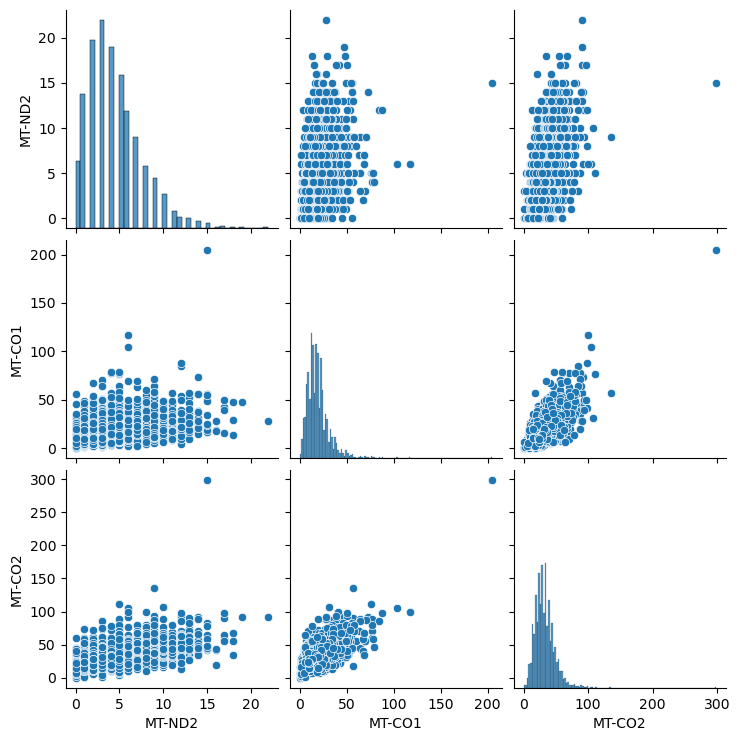

In [24]:
sns.pairplot(dftrial)
plt.show()

In [25]:
import numpy as np
import scipy.stats as stats

# Sample data
data = df2.iloc[0]

# Calculate the observed frequencies
observed_freq = np.bincount(data)

# Calculate the expected frequencies under Poisson distribution
lambda_estimate = np.mean(data)
expected_freq = [len(data) * stats.poisson.pmf(i, lambda_estimate) for i in range(len(observed_freq))]

# Perform Chi-Square test
chi_square_stat, p_value = stats.chisquare(observed_freq, f_exp=expected_freq)
print(f'Chi-Square Statistic: {chi_square_stat}, p-value: {p_value}')


Chi-Square Statistic: 5.411629567049457e+19, p-value: 0.0


In [26]:
df2.iloc[0][2]

7

In [27]:
def goodnessoffit(x):
    # Sample data
    data = x

    # Calculate the observed frequencies
    observed_freq = np.bincount(data)

    # Calculate the expected frequencies under Poisson distribution
    lambda_estimate = np.mean(data)
    expected_freq = [len(data) * stats.poisson.pmf(i, lambda_estimate) for i in range(len(observed_freq))]

    # Perform Chi-Square test
    chi_square_stat, p_value = stats.chisquare(observed_freq, f_exp=expected_freq)
    print(f'Chi-Square Statistic: {chi_square_stat}, p-value: {p_value}')

In [28]:
for i in range(13):
    goodnessoffit(list(df2.iloc[i]))

Chi-Square Statistic: 5.411629567049457e+19, p-value: 0.0
Chi-Square Statistic: 182280.05403073377, p-value: 0.0
Chi-Square Statistic: 6.324387261638274e+127, p-value: 0.0
Chi-Square Statistic: 1.42252252225543e+170, p-value: 0.0
Chi-Square Statistic: 1.9361556609095613e+41, p-value: 0.0
Chi-Square Statistic: 3237846.3124063057, p-value: 0.0
Chi-Square Statistic: 1.2127487413520484e+119, p-value: 0.0
Chi-Square Statistic: 43140132480.41983, p-value: 0.0
Chi-Square Statistic: 26483881747819.746, p-value: 0.0
Chi-Square Statistic: 40144.513824168775, p-value: 0.0
Chi-Square Statistic: 365769443.9713979, p-value: 0.0


ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
1.3400991561806238e-06

In [29]:
list_mean = [np.mean(df2.iloc[i]) for i in range(13)]
list_var = [np.var(df2.iloc[i]) for i in range(13)]

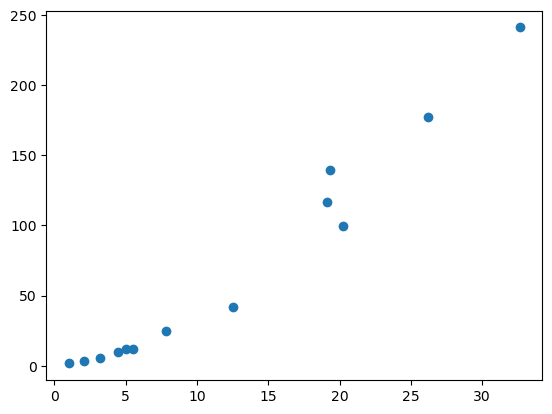

In [30]:
plt.scatter(list_mean, list_var)

In [31]:
df2



,0,1,2,3,4,5,6,7,8,9,...,2878,2879,2880,2881,2882,2883,2884,2885,2886,2887
MT-ND1,12,8,7,3,6,7,4,8,1,7,...,3,3,5,5,12,4,2,5,6,7
MT-ND2,3,4,2,2,3,1,1,3,3,3,...,1,1,3,2,3,0,5,0,12,1
MT-CO1,23,24,16,25,6,43,16,22,18,16,...,10,6,10,10,20,20,13,10,36,9
MT-CO2,53,35,30,23,26,53,17,26,12,31,...,15,24,25,29,32,15,28,22,45,24
MT-ATP8,34,10,8,14,14,18,0,12,3,29,...,16,23,15,15,29,11,12,13,19,11
MT-ATP6,3,2,1,5,1,4,1,0,0,1,...,1,2,1,1,1,3,2,1,2,0
MT-CO3,38,34,19,23,11,46,10,19,15,26,...,16,8,17,30,24,11,18,14,40,22
MT-ND3,6,3,6,2,4,5,1,4,1,6,...,3,2,3,8,5,2,6,4,5,1
MT-ND4L,20,15,20,13,14,18,8,10,1,12,...,9,7,8,13,14,5,14,6,20,7
MT-ND4,5,7,3,4,0,6,1,5,3,7,...,3,2,2,1,3,2,2,7,8,2


In [32]:
df = df2.T
# Calculate Pearson correlation matrix
pearson_corr = df.corr(method='pearson')

# Calculate Spearman correlation matrix
spearman_corr = df.corr(method='spearman')

# Calculate Kendall Tau correlation matrix
kendall_corr = df.corr(method='kendall')

# Display the Pearson correlation matrix
print(pearson_corr)

           MT-ND1    MT-ND2    MT-CO1    MT-CO2   MT-ATP8   MT-ATP6    MT-CO3  \
MT-ND1   1.000000  0.525991  0.419625  0.612295  0.667143  0.400690  0.661330   
MT-ND2   0.525991  1.000000  0.311262  0.507429  0.509876  0.354346  0.495591   
MT-CO1   0.419625  0.311262  1.000000  0.626311  0.520246  0.356145  0.659841   
MT-CO2   0.612295  0.507429  0.626311  1.000000  0.710762  0.458095  0.767201   
MT-ATP8  0.667143  0.509876  0.520246  0.710762  1.000000  0.421072  0.707043   
MT-ATP6  0.400690  0.354346  0.356145  0.458095  0.421072  1.000000  0.429827   
MT-CO3   0.661330  0.495591  0.659841  0.767201  0.707043  0.429827  1.000000   
MT-ND3   0.539989  0.407100  0.492686  0.633489  0.601355  0.361591  0.617501   
MT-ND4L  0.616468  0.482376  0.424377  0.705695  0.650590  0.410816  0.646038   
MT-ND4   0.426459  0.411894  0.343187  0.499603  0.479622  0.317592  0.451677   
MT-ND5   0.519288  0.408259  0.432962  0.537606  0.550999  0.301441  0.528673   
MT-ND6   0.302318  0.255753 

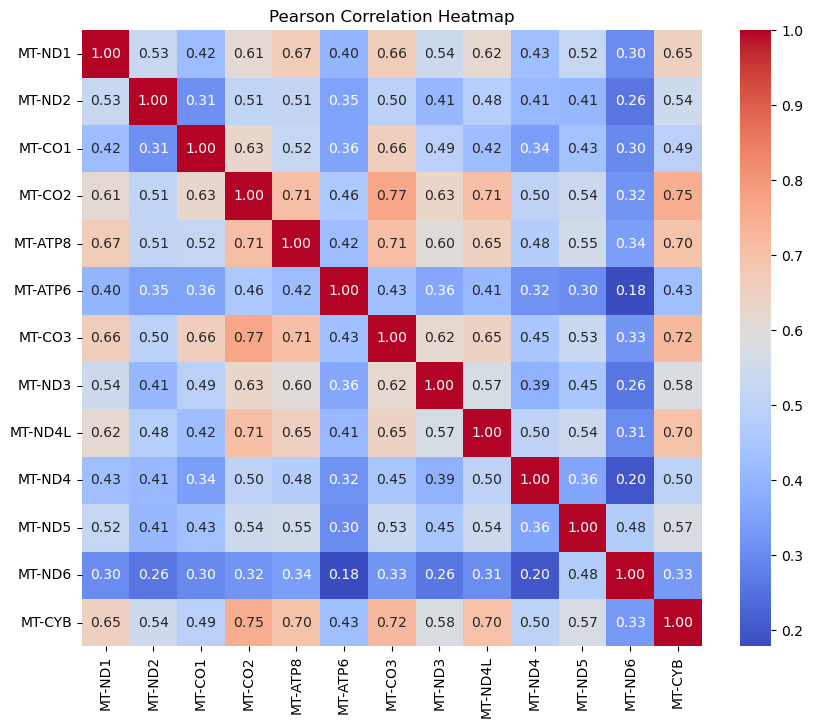

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Pearson Correlation Heatmap')
plt.show()

# Scatter plot for a specific pair of genes
# gene1 = 'GeneA'
# gene2 = 'GeneB'

# plt.figure(figsize=(8, 6))
# sns.scatterplot(x=df[gene1], y=df[gene2])
# plt.title(f'Scatter Plot of {gene1} vs {gene2}')
# plt.xlabel(gene1)
# plt.ylabel(gene2)
# plt.show()

In [35]:
import numpy as np
import pandas as pd
from scipy.stats import nbinom, chisquare

# Step 1: Estimate the parameters of the negative binomial distribution
# Example data

data = df  # replace this with your data

# Calculate the mean and variance of the data
mean = np.mean(data)
var = np.var(data)

# Estimate parameters r and p of the negative binomial distribution
# r = (mean^2) / (variance - mean)
# p = mean / variance
r = mean**2 / (var - mean)
p = mean / var

print(f"Estimated parameters: r = {r}, p = {p}")

# Step 2: Create a frequency table of the observed data
observed_freq = pd.Series(data).value_counts().sort_index()

# Step 3: Calculate expected frequencies
# Generate the expected frequencies using the negative binomial PMF
expected_freq = []
for k in observed_freq.index:
    expected_prob = nbinom.pmf(k, r, p)
    expected_freq.append(expected_prob * len(data))

# Convert to numpy arrays for the chi-square test
observed_freq = np.array(observed_freq)
expected_freq = np.array(expected_freq)

# Ensure there are no zero expected frequencies to avoid division by zero errors in the chi-square test
expected_freq = np.where(expected_freq == 0, 1e-10, expected_freq)

# Step 4: Perform the chi-square goodness of fit test
chi_square_stat, p_value = chisquare(f_obs=observed_freq, f_exp=expected_freq)

print(f"Chi-Square Statistic: {chi_square_stat}, p-value: {p_value}")


Estimated parameters: r = MT-ND1       11.987885
MT-ND2      -54.028219
MT-CO1        1.181186
MT-CO2        0.655490
MT-ATP8       1.437315
MT-ATP6     -16.607211
MT-CO3        0.910426
MT-ND3    -1411.164718
MT-ND4L       5.124334
MT-ND4      -22.684529
MT-ND5     -260.708007
MT-ND6      -14.047873
MT-CYB        1.723332
dtype: float64, p = MT-ND1     0.494573
MT-ND2     1.293245
MT-CO1     0.087937
MT-CO2     0.050788
MT-ATP8    0.105003
MT-ATP6    3.812294
MT-CO3     0.069174
MT-ND3     1.008757
MT-ND4L    0.294920
MT-ND4     2.174192
MT-ND5     1.049308
MT-ND6     7.817891
MT-CYB     0.123321
dtype: float64


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().